## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data=pd.read_csv('cars.csv')

In [3]:
data


,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


- problem- A vehicle is moving at a particular speed and applied brakes sudddenly. What could be possible distance travelled after applying the brakes suddenly 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
speed    50 non-null int64
dist     50 non-null int64
dtypes: int64(2)
memory usage: 928.0 bytes


In [5]:
data.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


- From above we can say that there is positive linear correlation of 0.80

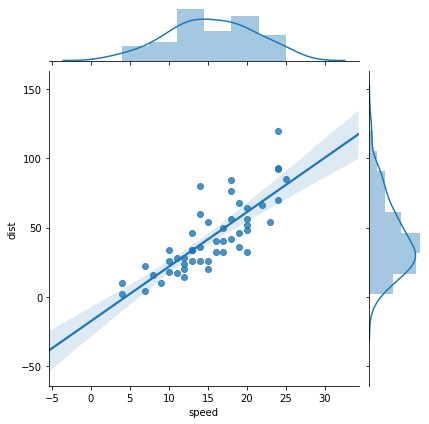

In [6]:
sns.jointplot(data['speed'],data['dist'],kind='reg')
plt.show()

In [7]:
xbar=data['speed'].mean()
ybar=data['dist'].mean()

In [8]:
data['x-xbar']=data['speed']-xbar
data['y-ybar']=data['dist']-ybar
data['(x-xbar)(y-ybar)']=data['x-xbar']*data['y-ybar']
data['(x-xbar)square']=data['x-xbar']**2

In [9]:
data.head()

,speed,dist,x-xbar,y-ybar,(x-xbar)(y-ybar),(x-xbar)square
0,4,2,-11.4,-40.98,467.172,129.96
1,4,10,-11.4,-32.98,375.972,129.96
2,7,4,-8.4,-38.98,327.432,70.56
3,7,22,-8.4,-20.98,176.232,70.56
4,8,16,-7.4,-26.98,199.652,54.76


In [10]:
Slope_num=data['(x-xbar)(y-ybar)'].sum()
Slope_den=data['(x-xbar)square'].sum()

In [11]:
Slope=Slope_num/Slope_den
Slope

3.932408759124088

In [12]:
Y_intercept=ybar-(Slope*xbar)
Y_intercept

-17.57909489051096

In [13]:
data['y_prediction']=Slope*(data['speed'])+Y_intercept

In [14]:
data.head()

,speed,dist,x-xbar,y-ybar,(x-xbar)(y-ybar),(x-xbar)square,y_prediction
0,4,2,-11.4,-40.98,467.172,129.96,-1.849460
1,4,10,-11.4,-32.98,375.972,129.96,-1.849460
2,7,4,-8.4,-38.98,327.432,70.56,9.947766
3,7,22,-8.4,-20.98,176.232,70.56,9.947766
4,8,16,-7.4,-26.98,199.652,54.76,13.880175


In [15]:
data['sse'] = ((data['dist'] - data['y_prediction'])**2)

In [16]:
sse=data['sse'].sum()

In [17]:
sse

11353.521051094893

In [18]:
mse=sse/len(data)
mse

227.07042102189786

In [19]:
rmse=math.sqrt(mse)
rmse

15.068855995791381

- y= 3.93*x - 17.57
- If speed =1 then your diatance is 
       ' 3.93*speed - 17.57 +/- 15.06 ->(rmse)'
- If speed =1 then your diatance is
           ' - 17.57 +/- 15.06'    


In [20]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

## Model Buliding

In [21]:
#method 1
import statsmodels.formula.api as smf


In [22]:
model =smf.ols(formula='dist~speed',data=data).fit() # .fit() -training with the given data 
# ols is ordinary least square- sse,sst=ssw+ssb,ssw,ssb

In [23]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 06 May 2020   Prob (F-statistic):           1.49e-12
Time:                        08:48:25   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.0

In [24]:
data['ols_pred']=model.predict(data['speed'])

In [25]:
data.head()

,speed,dist,x-xbar,y-ybar,(x-xbar)(y-ybar),(x-xbar)square,y_prediction,sse,ols_pred
0,4,2,-11.4,-40.98,467.172,129.96,-1.849460,14.818341,-1.849460
1,4,10,-11.4,-32.98,375.972,129.96,-1.849460,140.409699,-1.849460
2,7,4,-8.4,-38.98,327.432,70.56,9.947766,35.375925,9.947766
3,7,22,-8.4,-20.98,176.232,70.56,9.947766,145.256334,9.947766
4,8,16,-7.4,-26.98,199.652,54.76,13.880175,4.493657,13.880175


In [26]:
# R-squared - coefficient of determination- square of correlation
data[['speed','dist']].corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


In [27]:
data[['speed','dist']].corr()['dist'][0]**2

0.651079380758251

In [28]:
# we can give external vales also to predict
model.predict(pd.DataFrame([15,20,30],columns=['speed']))

0     41.407036
1     61.069080
2    100.393168
dtype: float64

In [29]:
# R-squared says how good is your correlation
# H0 : No correlation b/w independent and dependent variables
# HA : Correlation b/w them

p- 0.000
# significant region is ' 0.025- 0.975'
p is not fallinh in the significant region 
null hypothesis is rejected
There is corelation b/w them

- From the above

- Rsquare is good
- p value says there is correlation

SyntaxError: invalid syntax (<ipython-input-29-189c527696a7>, line 7)

In [30]:
# model 2
import statsmodels.api as sm

In [31]:
X = data['speed']
Y = data['dist']

In [32]:
X= sm.add_constant(X)
X

D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,speed
0,1.0,4
1,1.0,4
2,1.0,7
3,1.0,7
4,1.0,8
5,1.0,9
6,1.0,10
7,1.0,10
8,1.0,10
9,1.0,11


In [33]:
# model 3
import sklearn # scikit learn
from sklearn.linear_model import LinearRegression as LR

In [39]:
X1 = data['speed'].values # converting to arrays
Y1 = data['dist'].values

In [40]:
X1.shape

(50,)

In [41]:
model3= LR.fit(X1.reshape(-1,1),Y1.reshape(-1,1))

TypeError: fit() missing 1 required positional argument: 'y'

# Model acceptence/ Residual anaysis
- Accept your model based on errors

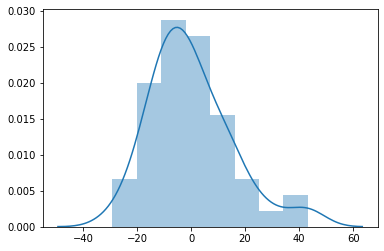

In [34]:
# residue or errors must follow normal distribution
sns.distplot(model.resid)
plt.show()

- from above we can say that there is little skewness in the data

In [45]:
import lmdiag

ModuleNotFoundError: No module named 'lmdiag'

In [37]:
pip install lmdiag

  Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13
Note: you may need to restart the kernel to use updated packages.


In [38]:
import lmdiag

<module 'matplotlib.pyplot' from 'D:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

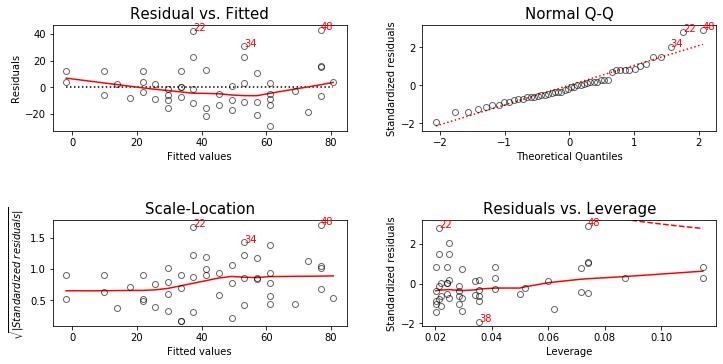

In [39]:
plt.figure(figsize=(10,5))
lmdiag.plot(model)

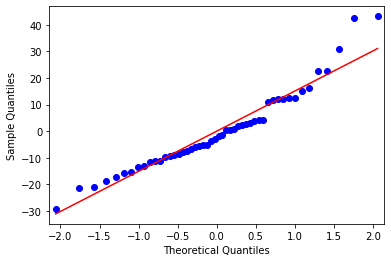

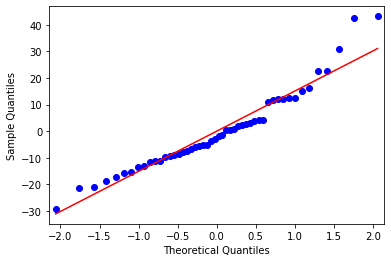

In [40]:
sm.graphics.qqplot(model.resid,line='s')

# hypothesis testing using shapiro
- Null Hypothesis - if p value > 0.05 it falls in significant region then accept the model
- Alternate Hypothesis - if p value < 0.05 it falls in critical region then reject the model

In [41]:
from scipy.stats import shapiro

In [42]:
shapiro(model.resid) # calculating the pvalue for the residual(y actual- y predict)
                  # output( statistic, pvalue)

(0.9450905919075012, 0.02152460627257824)

- from above the p value is 0.02 which is less than 0.05 so reject the null hypothesis

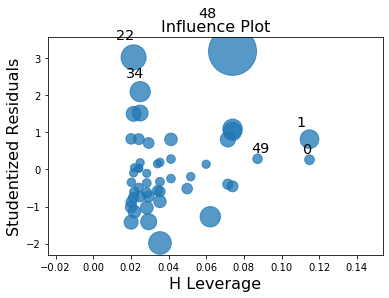

In [43]:
# Influence plot / Leverage plot
sm.graphics.influence_plot(model)
plt.show()

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [6]:
bm=pd.read_excel(r'BigMaxIndex.xlsx')

In [7]:
import statsmodels.formula.api as smf

In [22]:
model2=smf.ols(formula='Hourly_Wages_in_USD~Big_Mac_Price_in_USD',data=bm).fit()

In [24]:
print(model2.summary())

                             OLS Regression Results                            
Dep. Variable:     Hourly_Wages_in_USD   R-squared:                       0.662
Model:                             OLS   Adj. R-squared:                  0.648
Method:                  Least Squares   F-statistic:                     48.88
Date:                 Mon, 11 May 2020   Prob (F-statistic):           2.50e-07
Time:                         18:48:49   Log-Likelihood:                -66.251
No. Observations:                   27   AIC:                             136.5
Df Residuals:                       25   BIC:                             139.1
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             

In [17]:
bm.corr()

,Big_Mac_Price_in_USD,Hourly_Wages_in_USD
Big_Mac_Price_in_USD,1.000000,0.813396
Hourly_Wages_in_USD,0.813396,1.000000


In [19]:
bm.corr().Hourly_Wages_in_USD[0]**2

0.6616133883877514

In [21]:
r_square = 0.6616133883877514  
# > 0.5 so there is correlation

In [25]:
p_value=0.00 
# <0.5 so falls in critical region so there is correlation.

## Residual analysis

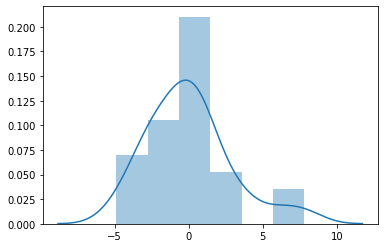

In [30]:
sns.distplot(model2.resid)
plt.show()

In [31]:
import lmdiag

<module 'matplotlib.pyplot' from 'D:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

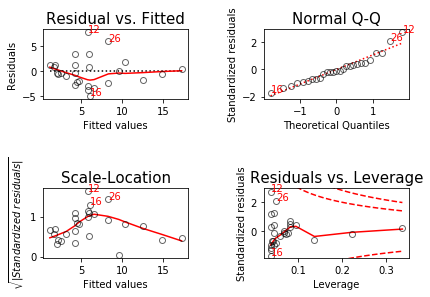

In [32]:
lmdiag.plot(model2)

<module 'matplotlib.pyplot' from 'D:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

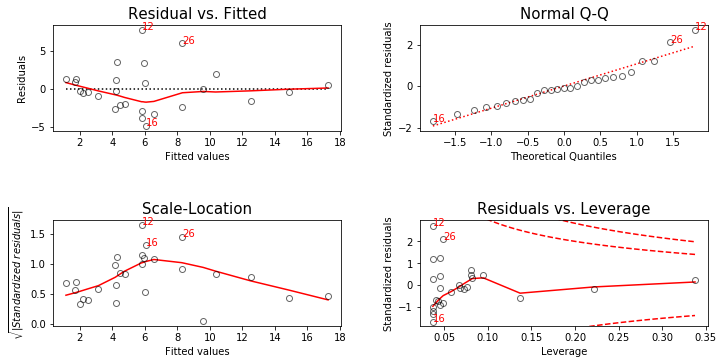

In [34]:
plt.figure(figsize=(10,5))
lmdiag.plot(model2)

In [36]:
# shaipro test
from scipy.stats import shapiro
shapiro(model2.resid)

(0.9490323066711426, 0.2030830681324005)

In [37]:
# 0.2 which is less than 0.5 so reject the model 

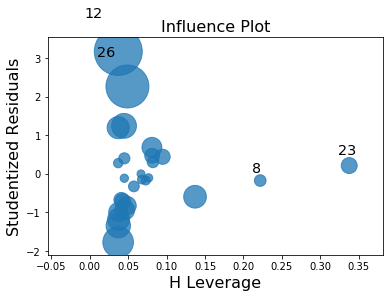

In [41]:
import statsmodels.api as sm
sm.graphics.influence_plot(model2)
plt.show()

In [ ]:
sm.gra